A quick analysis of the log var values produced from the heteroscedastic loss

In [121]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

In [136]:
PATH = '/home/Valentina/EXPERIMENT_RESULTS/AUTOCAL/'
EXPERIMENT = 'vale_exp_39'
epochs = [1000, 2000, 3000, 4000, 5000, 6000]
channels = ["0094", "0131", "0171", "0193", "0211", "0304", "0335"]
n_channels = len(channels)
test_images = 1346

In [137]:
log_vars = np.zeros((len(epochs), test_images, n_channels))
for i, epoch in enumerate(epochs):
    data = np.load(f'{PATH}{EXPERIMENT}/{epoch}_{EXPERIMENT}_test_predictions.npy')
    log_vars[i, :, :] = data[:, :, 2]

In [138]:
for i in range(len(epochs)):
    print(f'Min log_var at epoch {epochs[i]}', log_vars[i].max())

Min log_var at epoch 1000 -1.4235830307006836
Min log_var at epoch 2000 -0.648847222328186
Min log_var at epoch 3000 0.1402655839920044
Min log_var at epoch 4000 0.013564348220825195
Min log_var at epoch 5000 0.09158754348754883
Min log_var at epoch 6000 0.14690840244293213


With experiment 38 these values were all the same, now instead it does not saturate, good. Let's see now how the errors compare by channel.

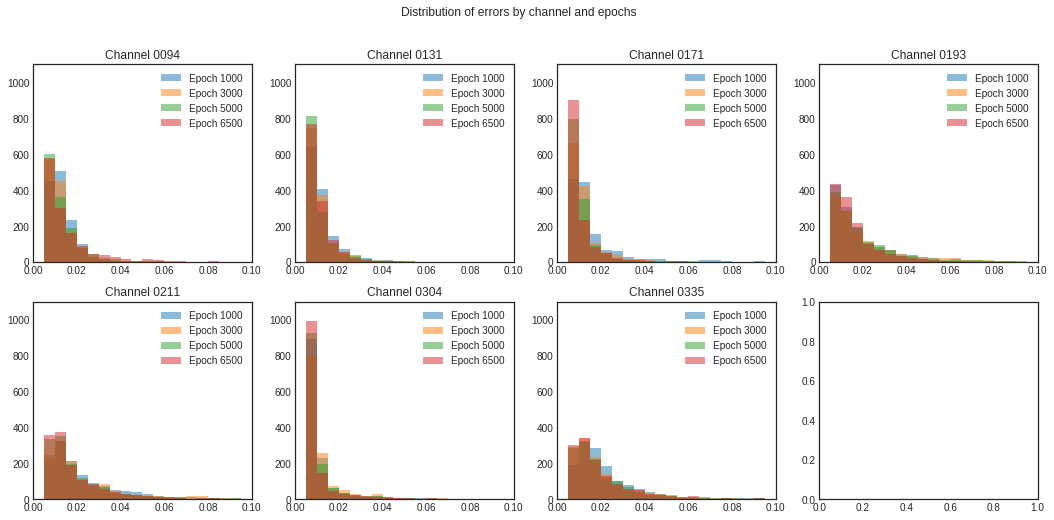

In [142]:
fig, axs = plt.subplots(2,4, figsize=(18, 8))
fig.suptitle('Distribution of errors by channel and epochs')
k = 0
row = 0
for j, channel in enumerate(channels):
    if j== 4:
        k=0
        row=1
    for i, epoch in enumerate([1000, 3000, 5000, 6500]):
        axs[row, k].hist(errs[i, :, j], alpha=0.5, histtype='stepfilled', bins=np.arange(0, 0.1, 0.005), 
                         label=f"Epoch {str(epoch)}")
        axs[row, k].legend()
        #axs[row, k].set_xlabel('error')
        #axs[row, k].set_ylabel('# images')
        axs[row, k].set_xlim([0, 0.1])
        axs[row, k].set_ylim([0, 1100])
    axs[row, k].title.set_text(f"Channel {channel}")
    k += 1

* 211, 193 and 335 seem to be the channels with larger incertitude

* not a lot of evolution across epochs

In [143]:
for j, channel in enumerate(channels):
    print(f"### Channel {channel} ###")
    for i, epoch in enumerate([1000, 3000, 5000, 6000]):
        print(f"The median error at epoch{epoch} is {np.median(errs[i, :, j])}")

### Channel 0094 ###
The median error at epoch1000 is 0.011907219074591878
The median error at epoch3000 is 0.010830945774975325
The median error at epoch5000 is 0.010658352227408838
The median error at epoch6000 is 0.011286403954545665
### Channel 0131 ###
The median error at epoch1000 is 0.010236378594092026
The median error at epoch3000 is 0.00941608046872229
The median error at epoch5000 is 0.008889179573923104
The median error at epoch6000 is 0.00911337345371559
### Channel 0171 ###
The median error at epoch1000 is 0.011790251893373946
The median error at epoch3000 is 0.010069458236454923
The median error at epoch5000 is 0.009222389007616343
The median error at epoch6000 is 0.00854648727076705
### Channel 0193 ###
The median error at epoch1000 is 0.013787324305298918
The median error at epoch3000 is 0.015570190043224014
The median error at epoch5000 is 0.014943920635619577
The median error at epoch6000 is 0.013088529553783085
### Channel 0211 ###
The median error at epoch1000 is 0